Exemplo baseado no **official YOLOv3 notebook**
Autoria: **Ultralytics** [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/).

#Categorias do YOLOv3

[ “person”, “bicycle”, “car”, “motorcycle”, “airplane”, “bus”, “train”, “truck”, “boat”, “traffic light”, “fire hydrant”, “stop sign”, “parking meter”, “bench”, “bird”, “cat”, “dog”, “horse”, “sheep”, “cow”, “elephant”, “bear”, “zebra”, “giraffe”, “backpack”, “umbrella”, “handbag”, “tie”, “suitcase”, “frisbee”, “skis”, “snowboard”, “sports ball”, “kite”, “baseball bat”, “baseball glove”, “skateboard”, “surfboard”, “tennis racket”, “bottle”, “wine glass”, “cup”, “fork”, “knife”, “spoon”, “bowl”, “banana”, “apple”, “sandwich”, “orange”, “broccoli”, “carrot”, “hot dog”, “pizza”, “donut”, “cake”, “chair”, “couch”, “potted plant”, “bed”, “dining table”, “toilet”, “tv”, “laptop”, “mouse”, “remote”, “keyboard”, “cell phone”, “microwave”, “oven”, “toaster”, “sink”, “refrigerator”, “book”, “clock”, “vase”, “scissors”, “teddy bear”, “hair drier”, “toothbrush”]

# Instalando

In [ ]:
!git clone https://github.com/ultralytics/yolov3  # clone repo
%cd yolov3
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.4.1+cu121 (Tesla T4)


In [ ]:
!python detect.py --weights yolov5s.pt  --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-230-g95971f4 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 227MB/s]

Fusing layers... 
YOLOv3s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
  0%|          | 0/2 [00:00<?, ?it/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, 30.6ms
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 30.8ms
Speed: 0.5ms pre-process, 30.7ms inference, 287.5ms NMS per image at shape (1, 3, 64

# Detecção de objetos
Na primeira execução, é necessário baixar o modelo.

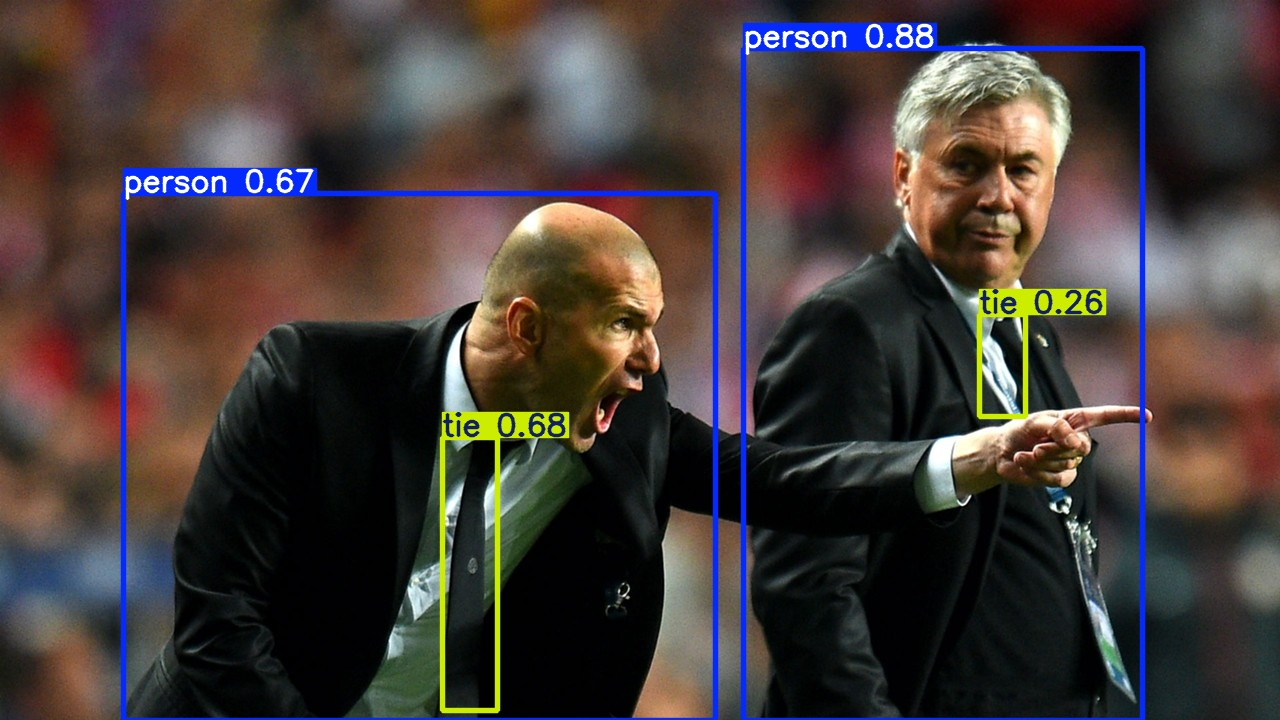

In [ ]:
Image(filename='runs/detect/exp6/zidane.jpg', width=600)

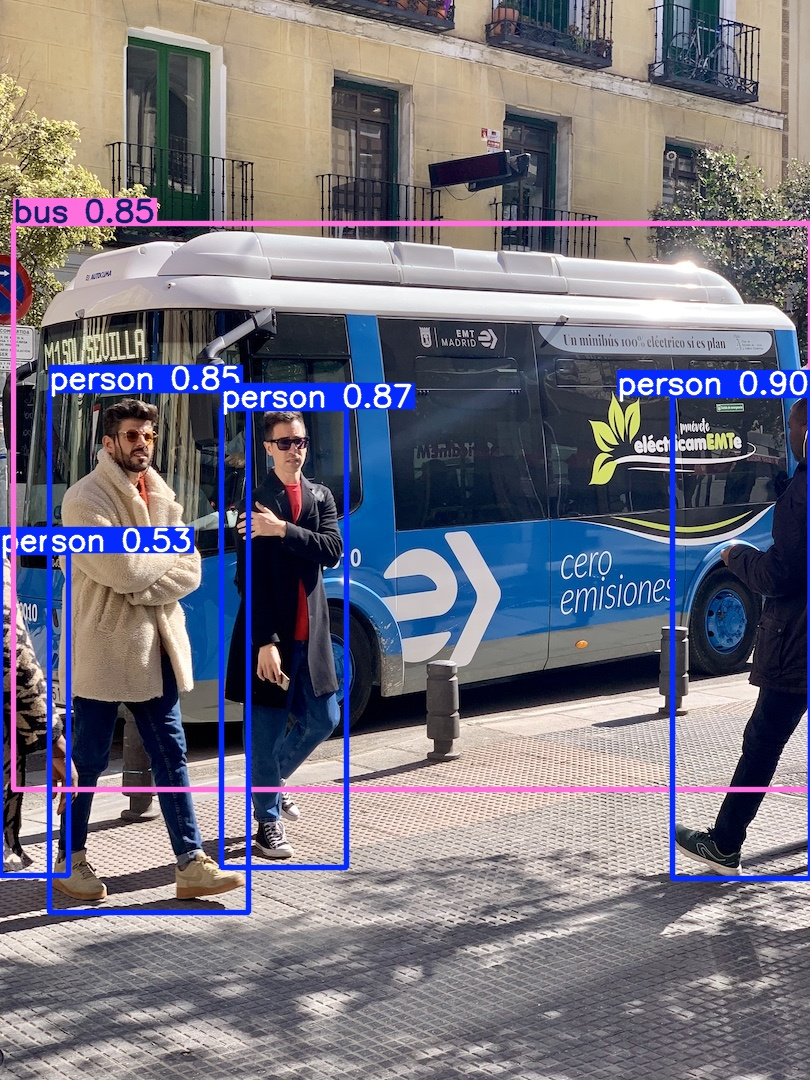

In [ ]:
Image(filename='runs/detect/exp6/bus.jpg', width=600)

# Yolo como Extrator de Features

In [ ]:
!wget https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip

--2024-10-11 07:58:42--  https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.52.131.233
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135033638 (129M) [application/zip]
Saving to: ‘spatial_envelope_256x256_static_8outdoorcategories.zip’

spatial_envelope_25 100%[===================>] 128.78M  18.5MB/s    in 7.6s    

2024-10-11 07:58:50 (16.9 MB/s) - ‘spatial_envelope_256x256_static_8outdoorcategories.zip’ saved [135033638/135033638]



In [ ]:
!unzip spatial_envelope_256x256_static_8outdoorcategories.zip -d /content

Archive:  spatial_envelope_256x256_static_8outdoorcategories.zip
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_arnat59.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_art1130.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_art294.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_art487.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_bea1.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_bea10.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_bea14.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_bea2.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_bea20.jpg  
  inflating: /content/spatial_envelope_256x256_static_8outdoorcategories/coast_bea24.jpg  
  inflating: /content

In [ ]:
!rm -rf /content/outdoorcategories
!python detect.py --weights yolov5n.pt --conf 0.2 --save-conf --save-txt --source /content/spatial_envelope_256x256_static_8outdoorcategories --project /content/outdoorcategories --exist-ok

detect: weights=['yolov5n.pt'], source=/content/spatial_envelope_256x256_static_8outdoorcategories, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/outdoorcategories, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-230-g95971f4 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 3.87M/3.87M [00:00<00:00, 137MB/s]

Fusing layers... 
YOLOv3n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
  0%|          | 0/2688 [00:00<?, ?it/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2688 /content/spatial_envelope_256x256_static_8outdoorcategories/coast_arnat59.jpg: 640x640 2 persons, 3 boats, 6.2ms
image 2/2688 /content/spatial_envelope_256x256_static_8outdoor

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd

mypath = '/content/outdoorcategories/exp/labels' # diretorio com as predicoes do YoLo
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
L = []
for yolo_features in onlyfiles:
  df = pd.read_csv(mypath+'/'+yolo_features, sep=' ', header=None)
  df['filename'] = yolo_features.replace('.txt', '.png')
  L.append(df)

df_yolo_features = pd.concat(L)
df_yolo_features

,0,1,2,3,4,5,filename
0,2,0.470703,0.546875,0.042969,0.023438,0.203696,street_par102.png
1,2,0.644531,0.564453,0.054688,0.082031,0.322044,street_par102.png
2,2,0.851562,0.619141,0.296875,0.191406,0.613008,street_par102.png
0,58,0.730469,0.564453,0.054688,0.058594,0.417523,street_gre653.png
1,0,0.283203,0.501953,0.019531,0.042969,0.450432,street_gre653.png
...,...,...,...,...,...,...,...
4,2,0.722656,0.601562,0.062500,0.062500,0.570463,street_boston274.png
5,2,0.632812,0.605469,0.132812,0.078125,0.604606,street_boston274.png
6,2,0.984375,0.621094,0.031250,0.078125,0.677779,street_boston274.png
7,0,0.218750,0.615234,0.039062,0.121094,0.682094,street_boston274.png


In [ ]:
new_df = df_yolo_features.groupby(['filename', 0])[5].sum().unstack()
new_df = new_df.reset_index()
new_df.fillna(0, inplace=True)
new_df['label'] = new_df['filename'].str.split('_').str[0]
new_df


,filename,0,1,2,3,4,5,6,7,8,...,58,60,62,68,69,71,73,74,77,label
0,coast_arnat59.png,0.884329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.126678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,coast
1,coast_art1130.png,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,coast
2,coast_bea10.png,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,coast
3,coast_bea24.png,0.341268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,coast
4,coast_bea27.png,1.537203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,coast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,tallbuilding_urban979.png,1.059232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,tallbuilding
1095,tallbuilding_urban982.png,1.031305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,tallbuilding
1096,tallbuilding_urban983.png,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301866,0.0,tallbuilding
1097,tallbuilding_urban987.png,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312947,0.0,tallbuilding


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split

df_data = new_df.drop(['filename', 'label'], axis=1)
X = df_data.to_numpy()
y = new_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       coast       0.54      0.52      0.53        29
      forest       0.00      0.00      0.00         5
     highway       0.55      0.68      0.61        44
  insidecity       0.30      0.32      0.31        37
    mountain       0.33      0.07      0.12        14
 opencountry       0.31      0.36      0.33        11
      street       0.70      0.67      0.68        57
tallbuilding       0.23      0.13      0.17        23

    accuracy                           0.47       220
   macro avg       0.37      0.34      0.34       220
weighted avg       0.47      0.47      0.46       220

